In [204]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import copy

In [205]:
data=pd.read_csv("E:\Python\PracticleData\data4.txt",names=['test1','test2','qualified'])

In [206]:
data.head()

,test1,test2,qualified
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [207]:
positive=data[data['qualified'].isin([1])]
negative=data[data['qualified'].isin([0])]

Text(0, 0.5, 'test2')

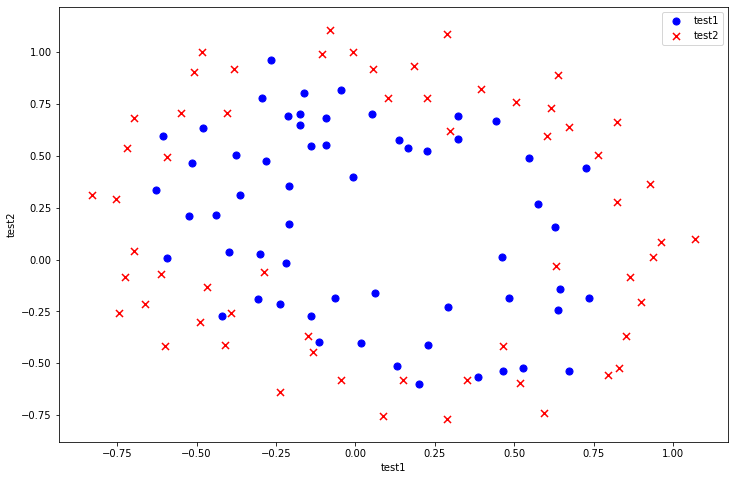

In [208]:
fig,ax = plt.subplots(figsize=(12,8))                          
ax.scatter(positive['test1'],positive['test2'],c='b',marker='o',s=50,label='test1')  
ax.scatter(negative['test1'],negative['test2'],c='r',marker='x',s=50,label='test2')
ax.legend()
ax.set_xlabel('test1')
ax.set_ylabel('test2')

In [209]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [210]:
def computeCost(X,y,theta):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y) 
    first = np.multiply(-y,np.log(sigmoid(X*theta.T)))
    second = np.multiply((1-y),np.log(1-sigmoid(X*theta.T)))
    return np.sum(first-second)/len(X)
    

In [211]:
#how to plot any degree polynomial
degree = 2
x1 = data['test1']
x2 = data['test2']
for i in range(0,degree+1):
    for j in range(0,degree+1):
        if (i+j>0 and i+j<degree+1):
            data['F'+str(i)+str(j)] = np.power(x1,i)*np.power(x2,j)

In [212]:
data=data.drop('test1',axis=1)
data=data.drop('test2',axis=1)
data.head()

,qualified,F01,F02,F10,F11,F20
0,1,0.69956,0.489384,0.051267,0.035864,0.002628
1,1,0.68494,0.469143,-0.092742,-0.063523,0.008601
2,1,0.69225,0.479210,-0.213710,-0.147941,0.045672
3,1,0.50219,0.252195,-0.375000,-0.188321,0.140625
4,1,0.46564,0.216821,-0.513250,-0.238990,0.263426


In [213]:
data.insert(1,'ones',1)

In [214]:
theta=np.zeros((1,6))


(numpy.matrix, numpy.matrix, numpy.ndarray)

In [215]:
X=data.iloc[:,1:7]
y=data.iloc[:,0:1]


In [216]:
data.head()

,qualified,ones,F01,F02,F10,F11,F20
0,1,1,0.69956,0.489384,0.051267,0.035864,0.002628
1,1,1,0.68494,0.469143,-0.092742,-0.063523,0.008601
2,1,1,0.69225,0.479210,-0.213710,-0.147941,0.045672
3,1,1,0.50219,0.252195,-0.375000,-0.188321,0.140625
4,1,1,0.46564,0.216821,-0.513250,-0.238990,0.263426


In [217]:
np.shape(X),np.shape(y),np.shape(theta),theta

((118, 6), (118, 1), (1, 6), array([[0., 0., 0., 0., 0., 0.]]))

In [218]:
c=computeCost(X,y,theta)

In [219]:
c

0.6931471805599454

In [220]:
X=np.matrix(X)
y=np.matrix(y)
theta=np.matrix(theta)

In [221]:
def gradientDescent(X,y,theta,alpha, iterations):
    temp = np.matrix(np.zeros((1,6)))
    parameters = 6  #theta0,theta1,theta2
    cost = np.zeros(iterations) #error of every iteration
    for i in range(iterations):
        error = sigmoid(X*theta.T) - y
        for j in range(parameters):
            term = np.multiply(error, X[:,j]) 
            temp[0,j] = theta[0,j] - (alpha* np.sum(term))
        theta = temp
        cost[i] = computeCost(X,y,theta) 
    return theta,cost

In [222]:
a,b=gradientDescent(X,y,theta,0.1,10000)

In [223]:
b[-1]   #0.3481053127977324

0.3481053127977324

In [224]:
a   ##[ 0.12412152,  0.05551967, -0.35767681, -0.11490904, -0.1275987 ,-0.49461193]

matrix([[  5.16939737,   4.16623174, -11.8224845 ,   3.2475016 ,
          -7.53125756, -12.02686332]])

In [225]:
h=sigmoid(X*a.T)

In [226]:
h[0:5]

matrix([[0.89687412],
        [0.92759801],
        [0.90541407],
        [0.94209341],
        [0.81919944]])

In [227]:
for i in range(len(h)):
    if h[i]>0.5:
        h[i]=1
    else:
        h[i]=0

In [228]:
count=0
for i in range(len(y)):
    if y[i]==h[i]:
        count+=1

In [229]:
count

101

In [230]:
acc=(count*100)/len(X)

In [231]:
acc

85.59322033898304

In [232]:
a[0,5]

-12.0268633156532

In [233]:
l1=[]
l2=[]
x1= np.linspace(data.F01.min(),data.F01.max(),  500)     #np.linspace(-1,1,500)
x2= np.linspace(data.F10.min(),data.F10.max(),  500)     #np.linspace(-1,1,500)
for i in x1:
    for j in x2:
        d = sigmoid(a[0,0]+a[0,1]*j+a[0,2]*j*j+a[0,3]*i+a[0,4]*i*j+a[0,5]*i*i)
        if d>0.49 and d< 0.51:
            l1.append(i)
            l2.append(j)


Text(0, 0.5, 'test2')

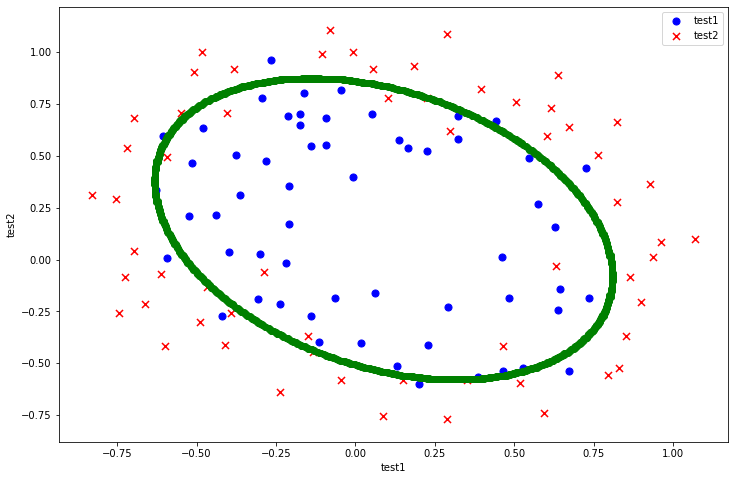

In [234]:
fig,ax = plt.subplots(figsize=(12,8))                          
ax.scatter(positive['test1'],positive['test2'],c='b',marker='o',s=50,label='test1')  
ax.scatter(negative['test1'],negative['test2'],c='r',marker='x',s=50,label='test2')
ax.legend()
ax.scatter(l1,l2, c='g')
ax.set_xlabel('test1')
ax.set_ylabel('test2')